In [0]:
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# hyper parameters
num_bandits = 10

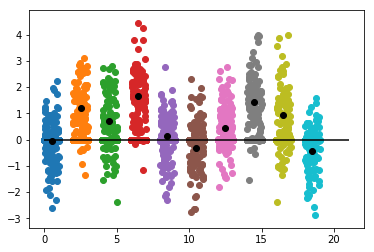

In [414]:
# choose random gaussian means with mean 0 and variance 1 for the bandits
means = np.random.normal(0, 1, num_bandits)

# display the means
samples = np.zeros((num_bandits,1000))
for i in range(100):
  samples[:,i] = np.random.normal(means,np.ones(num_bandits))
for i in range(num_bandits):
  plt.scatter(2*i+np.random.rand(1000),samples[i,:])
  plt.scatter(2*i+0.5,means[i],c='k')
plt.hlines(0,0,2*num_bandits+1)  
plt.show()

In [0]:
def reward(bandit):
  return np.random.normal(means[bandit],1)

In [0]:
def plot_bandits(epochs, val_function, avg_reward, optimal_acts):
    plt.subplot(121)
    plt.plot(np.arange(epochs),avg_reward)
    plt.xlabel('epochs')
    plt.ylabel('Average reward')    
    plt.subplot(122)
    plt.plot(np.arange(epochs),optimal_acts)
    plt.xlabel('epochs')
    plt.ylabel('Optimal action %')  
    plt.gca().set_ylim((0,100))
    plt.show()

In [0]:
# define the algorithm
def run_bandits(epochs=2000, init_val=0, epsilon=0.01, every_n=100, c=0, plot=True):
    # define the value function
    val_function  = init_val * np.ones(num_bandits)
    N = np.zeros(num_bandits)
    avg_reward = []
    rew_avg = 0
    optimal_act = 0
    optimal_acts = []
    true_act = np.argmax(means)
    print(true_act)
    for epoch in range(1,epochs+1):
        if np.random.rand() < epsilon:
            action = np.random.randint(num_bandits)
        else:
            # argmax returns the first instance instead of breaking ties arbitrarily
            #action = np.argmax(val_function + c*np.sqrt(epoch/N))
            action = np.random.choice(np.flatnonzero((val_function + c*np.sqrt(epoch/(N+0.0001))) == (val_function + c*np.sqrt(epoch/(N+0.0001))).max()))
        N[action] += 1
        if action == true_act:
            optimal_act += 1
        val_function[action] = val_function[action] + (1/N[action])*(reward(action)-val_function[action])
        rew_avg = (rew_avg*(epoch-1) + reward(action))/epoch
        avg_reward.append(rew_avg)
        optimal_acts.append(100*optimal_act/epoch)

        if not epoch%every_n:
            print(f'epoch {epoch} / {epochs}')

    if plot:
        plot_bandits(epochs, val_function, avg_reward, optimal_acts)

3
epoch 100 / 2000
epoch 200 / 2000
epoch 300 / 2000
epoch 400 / 2000
epoch 500 / 2000
epoch 600 / 2000
epoch 700 / 2000
epoch 800 / 2000
epoch 900 / 2000
epoch 1000 / 2000
epoch 1100 / 2000
epoch 1200 / 2000
epoch 1300 / 2000
epoch 1400 / 2000
epoch 1500 / 2000
epoch 1600 / 2000
epoch 1700 / 2000
epoch 1800 / 2000
epoch 1900 / 2000
epoch 2000 / 2000


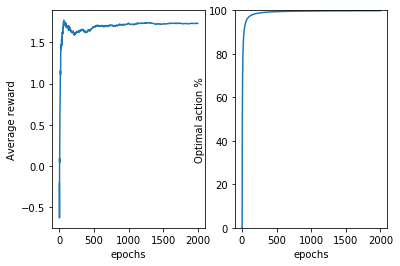

In [418]:
run_bandits(epsilon=0)